## Exploratory Data Analysis of All Data

Gain an understanding of how the features relate to one another and visualize the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('WeatherandEnergyData.csv', index_col=0)

In [9]:
df.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188
2,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193
4,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293


In [12]:
#Explore correlation between the continuous feature variables
df.corr()

,Year,Daily Energy Demand,Max Temp,Min Temp
Year,1.000000,-0.221227,-0.102049,-0.225067
Daily Energy Demand,-0.221227,1.000000,0.532853,0.634269
Max Temp,-0.102049,0.532853,1.000000,0.695286
Min Temp,-0.225067,0.634269,0.695286,1.000000


<AxesSubplot:>

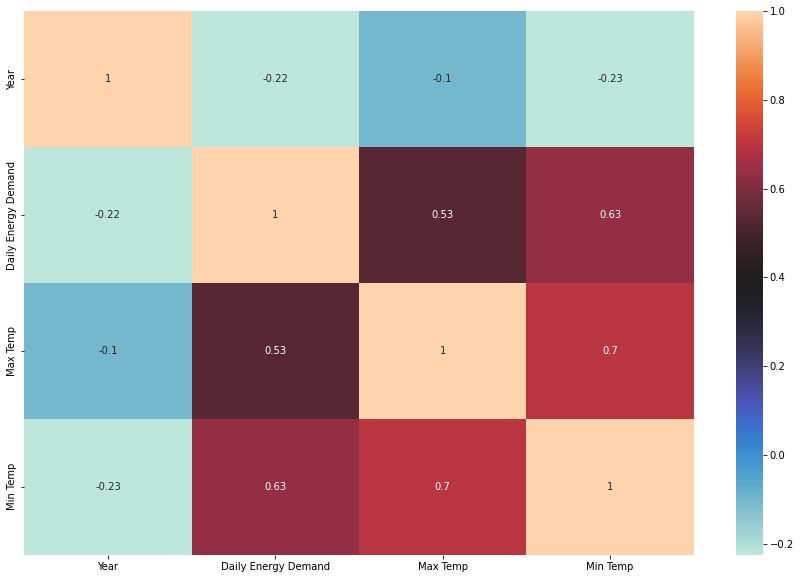

In [13]:
#Viz with a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='icefire', annot=True)

The min and max temp are somewhat correlated with daily energy demand. Somewhat surpringly, the minimum temperature is more correlated with energy demand than the maximum temperature.

<AxesSubplot:xlabel='Min Temp', ylabel='Daily Energy Demand'>

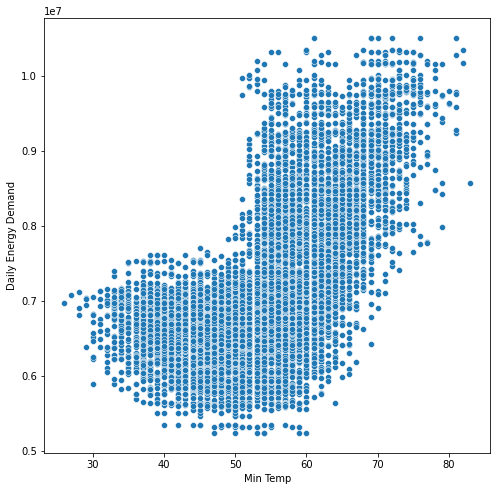

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x= 'Min Temp', y='Daily Energy Demand')

In [19]:
dayorder= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthorder= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<AxesSubplot:xlabel='Month', ylabel='Min Temp'>

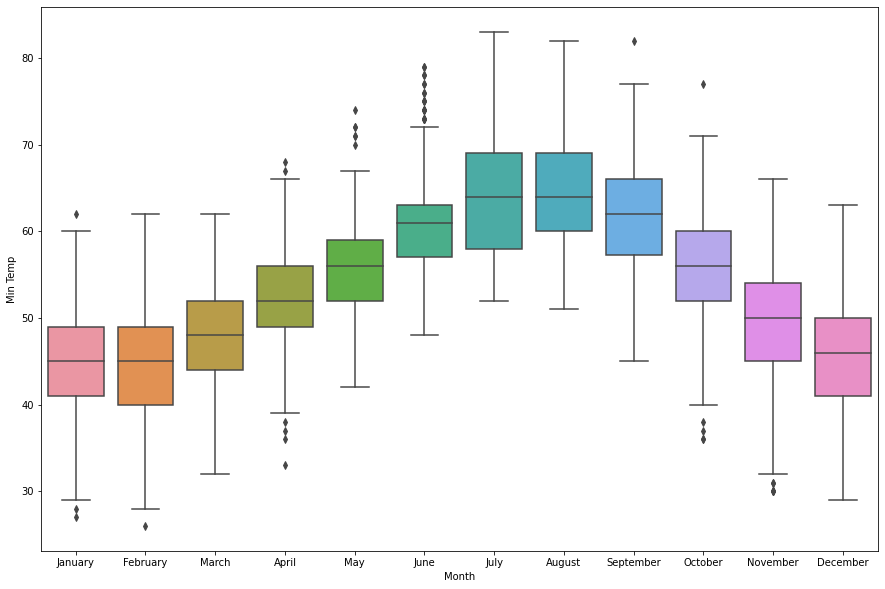

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x= 'Month', y='Min Temp', order=monthorder)

As expected, the minimum temperature correlates with the month.

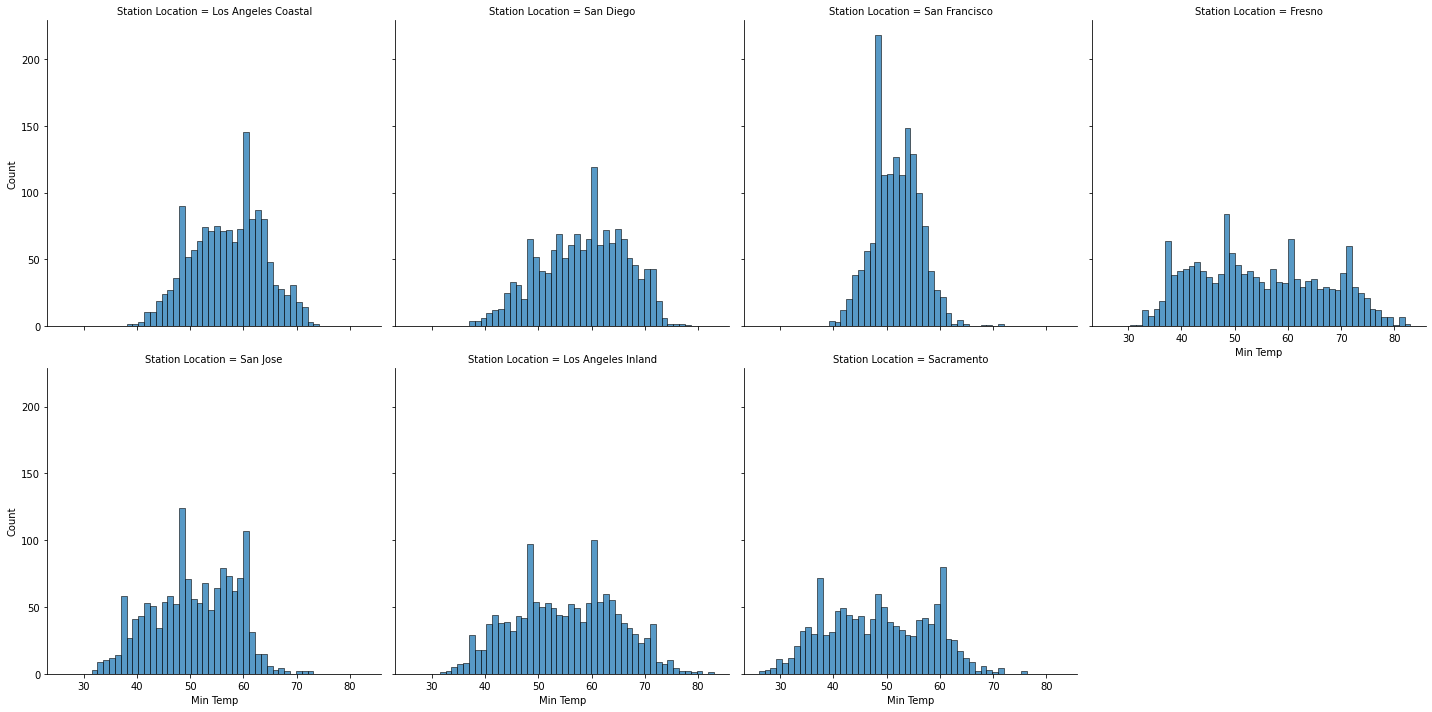

In [86]:
sns.displot(df, x='Min Temp', col='Station Location',col_wrap= 4)

<AxesSubplot:xlabel='Station Location', ylabel='Min Temp'>

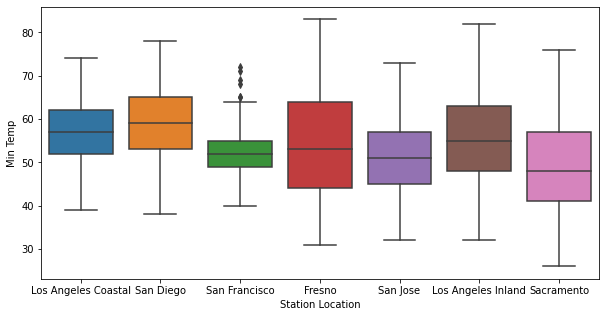

In [98]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x= 'Station Location', y='Min Temp')

#### Figure 21

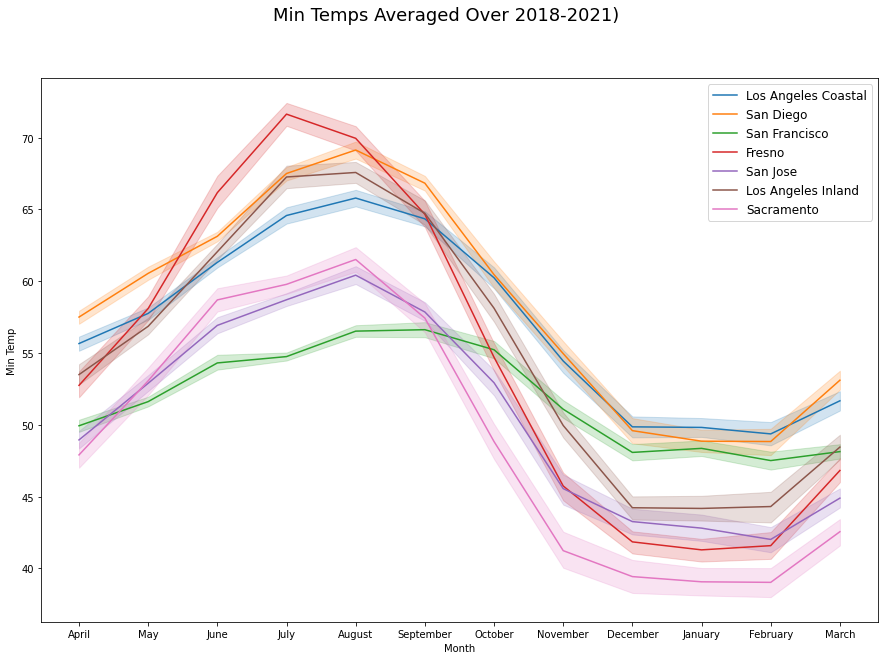

In [260]:
fig= plt.figure(figsize=(15,10))
plt.suptitle("Min Temps Averaged Over 2018-2021)", fontsize = 18)

sns.lineplot(data=df, x='Month', y='Min Temp', hue='Station Location')
plt.legend(fontsize=12)


In [119]:
df.drop('Year', axis=1).groupby('Station Location').corr()

Daily Energy Demand  Max Temp  \
Station Location                                                         
Fresno              Daily Energy Demand             1.000000  0.712190   
                    Max Temp                        0.712190  1.000000   
                    Min Temp                        0.748328  0.928668   
Los Angeles Coastal Daily Energy Demand             1.000000  0.475748   
                    Max Temp                        0.475748  1.000000   
                    Min Temp                        0.690034  0.630020   
Los Angeles Inland  Daily Energy Demand             1.000000  0.690351   
                    Max Temp                        0.690351  1.000000   
                    Min Temp                        0.732653  0.814865   
Sacramento          Daily Energy Demand             1.000000  0.672503   
                    Max Temp                        0.672503  1.000000   
                    Min Temp                        0.673701  0.826329   
San Diego           Daily Energy Demand             1.000000  0.562095   
                    Max Temp                        0.562095  1.000000   
                    Min Temp                        0.676093  0.562093   
San Francisco       Daily Energy Demand             1.000000  0.389378   
                    Max Temp                        0.389378  1.000000   
                    Min Temp                        0.578276  0.706821   
San Jose            Daily Energy Demand             1.000000  0.620161   
                    Max Temp                        0.620161  1.000000   
                    Min Temp                        0.683187  0.755880   

                                         Min Temp  
Station Location                                   
Fresno              Daily Energy Demand  0.748328  
                    Max Temp             0.928668  
                    Min Temp             1.000000  
Los Angeles Coastal Daily Energy Demand  0.690034  
                    Max Temp             0.630020  
                    Min Temp             1.000000  
Los Angeles Inland  Daily Energy Demand  0.732653  
                    Max Temp             0.814865  
                    Min Temp             1.000000  
Sacramento          Daily Energy Demand  0.673701  
                    Max Temp             0.826329  
                    Min Temp             1.000000  
San Diego           Daily Energy Demand  0.676093  
                    Max Temp             0.562093  
                    Min Temp             1.000000  
San Francisco       Daily Energy Demand  0.578276  
                    Max Temp             0.706821  
                    Min Temp             1.000000  
San Jose            Daily Energy Demand  0.683187  
                    Max Temp             0.755880  
                    Min Temp             1.000000

In [ ]:
df.drop('Year', axis=1).groupby('Station Location').corr()

<AxesSubplot:ylabel='Station Location-None'>

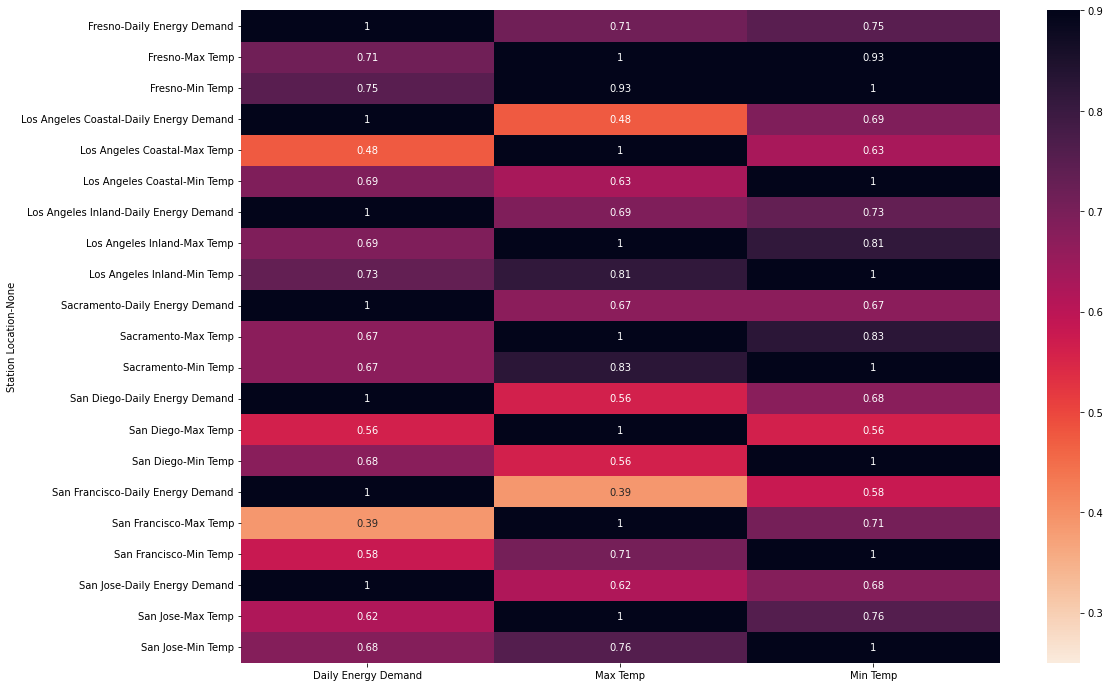

In [166]:
plt.figure(figsize=(17,12))
sns.heatmap(df.drop('Year', axis=1).groupby('Station Location').corr(), cmap='rocket_r', vmax=0.9, vmin=0.25, annot=True)

Fresno's temps correlate most with the Daily Energy Demand. LA's inland temp's are also fairly well correlated, may be worth seeing the effect of combining the LA inland and coastal regions.

In [190]:
la_df = df[(df['Station Location']=='Los Angeles Coastal') | (df['Station Location']=='Los Angeles Inland')]

In [191]:
la_df.corr()['Daily Energy Demand']

Year                  -0.229460
Daily Energy Demand    1.000000
Max Temp               0.543862
Min Temp               0.699874
Name: Daily Energy Demand, dtype: float64

That actually made things worse in terms of predicting the daily energy demand, likely because LA's coastal max temp is so poorly correlated.

### Looking at Fresno's Data in More Detail

In [185]:
fresno_df = df[df['Station Location']=='Fresno']

In [187]:
fresno_df.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193
9,2018-04-11,04/11/2018,Wednesday,April,2018,6927243.5,75.0,51.0,Fresno,GHCND:USW00093193
15,2018-04-12,04/12/2018,Thursday,April,2018,6670701.0,65.0,47.0,Fresno,GHCND:USW00093193
21,2018-04-13,04/13/2018,Friday,April,2018,6643068.0,71.0,44.0,Fresno,GHCND:USW00093193
27,2018-04-14,04/14/2018,Saturday,April,2018,6183992.0,81.0,48.0,Fresno,GHCND:USW00093193


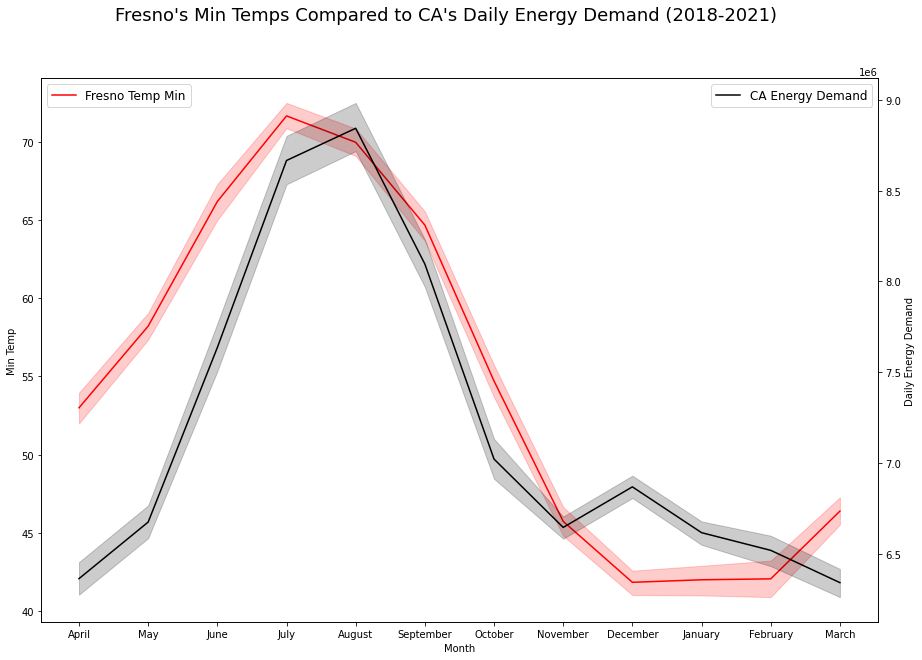

In [264]:
fig= plt.figure(figsize=(15,10))
plt.suptitle("Fresno's Min Temps Compared to CA's Daily Energy Demand (2018-2021)", fontsize = 18)
ax = fig.add_subplot(111)


lineplotdata=fresno_df[(fresno_df['Year'] != 2022)]
lineplotdata2=fresno_df[(fresno_df['Year'] != 2022)]

sns.lineplot(data=lineplotdata, x='Month', y='Min Temp', color='red')
plt.legend(labels=["Fresno Temp Min"], fontsize=12, loc=2)

ax2 = plt.twinx()
sns.lineplot(data=lineplotdata2, x='Month', y='Daily Energy Demand', ax=ax2, color='black')
plt.legend(labels=["CA Energy Demand"], fontsize=12, loc=1)

The trends are similar between the two traces. The most notable deviation occurs in the spring when CA's energy demand does not rise as quickly as Fresno's temperatures. Perhaps Fresno heats up before the majority of the state because of it's geographical region, looking back at Figure 21, that is indeed the case. It may be worth considering adding a feature for the season though, if we expect the correlation between energy demand and temperature is stronger in some seasons than others.

Let's make a new graph similar to the above one, but this time examining all of the seasonal data in relation to the energy demand to see if this deviation is unique to Fresno.

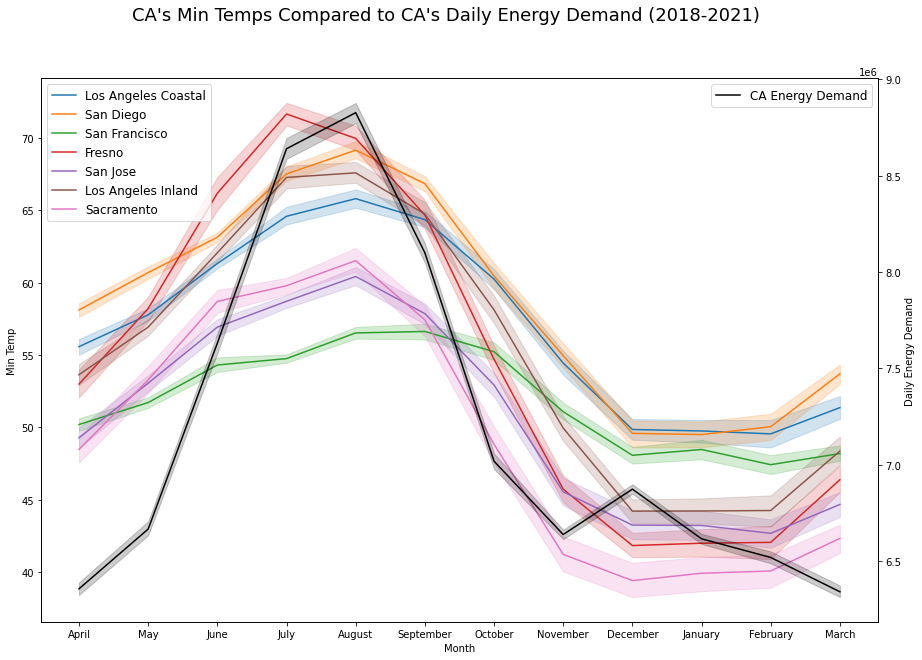

In [263]:
fig= plt.figure(figsize=(15,10))
plt.suptitle("CA's Min Temps Compared to CA's Daily Energy Demand (2018-2021)", fontsize = 18)
ax = fig.add_subplot(111)


lineplotdata=df[(df['Year'] != 2022)]

sns.lineplot(data=lineplotdata, x='Month', y='Min Temp', hue='Station Location', legend='full')
plt.legend(fontsize=12, loc=2)

ax2 = plt.twinx()
sns.lineplot(data=lineplotdata, x='Month', y='Daily Energy Demand', ax=ax2, color='black')
plt.legend(labels=["CA Energy Demand"], fontsize=12, loc=1)

It seems like the data correlates most in the summer. Engineering a season feature is not a bad idea.

### Examining the influence of seasons on data

In [287]:
from datetime import date, datetime

In [293]:
df['Date-DateTime'] = pd.to_datetime((df['Date-DateTime']))

In [313]:
from datetime import date, datetime

def get_season(x):

   # extract day of the year from the date    
    doy =  x.day_of_year

    # "day of year" ranges for the northern hemisphere
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else

    if doy in spring:
      season = 'spring'
    elif doy in summer:
      season = 'summer'
    elif doy in fall:
      season = 'fall'
    else:
      season = 'winter'
    return season

In [317]:
df['Season']= df['Date-DateTime'].apply(lambda x: get_season(x))

In [320]:
df.head()

,Date-DateTime,Date,Day,Month,Year,Daily Energy Demand,Max Temp,Min Temp,Station Location,Station ID,Season
0,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,79.0,60.0,Los Angeles Coastal,GHCND:USW00023174,spring
1,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,85.0,60.0,San Diego,GHCND:USW00023188,spring
2,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,63.0,52.0,San Francisco,GHCND:USW00023272,spring
3,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,86.0,59.0,Fresno,GHCND:USW00093193,spring
4,2018-04-10,04/10/2018,Tuesday,April,2018,7183786.0,69.0,52.0,San Jose,GHCND:USW00023293,spring


<AxesSubplot:xlabel='Season', ylabel='Daily Energy Demand'>

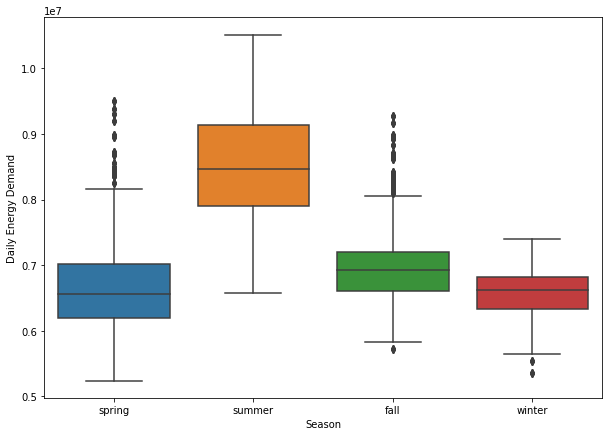

In [327]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Season'], y=df['Daily Energy Demand'])

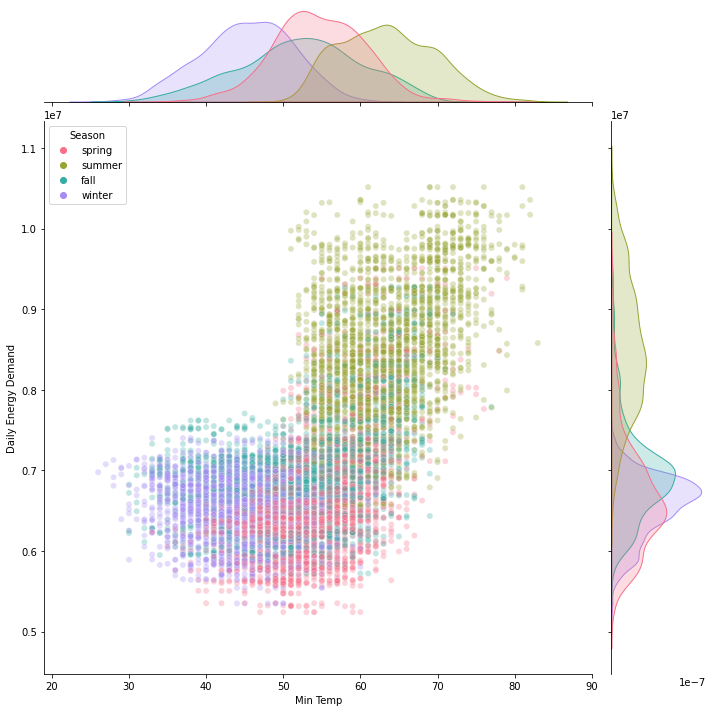

In [341]:

sns.jointplot(data=df, x='Min Temp', y='Daily Energy Demand', hue='Season', height=10, palette='husl', alpha=0.3)

The daily energy demand is much higher in the summer than in the rest of the year, this corresponds with increased temperatures. It is interesting to note that the other seasons have a much broader temperature distribution than they do energy demand distribution. Let's examine this in more detail by getting quantitative values for the correlation.

<AxesSubplot:ylabel='Season-None'>

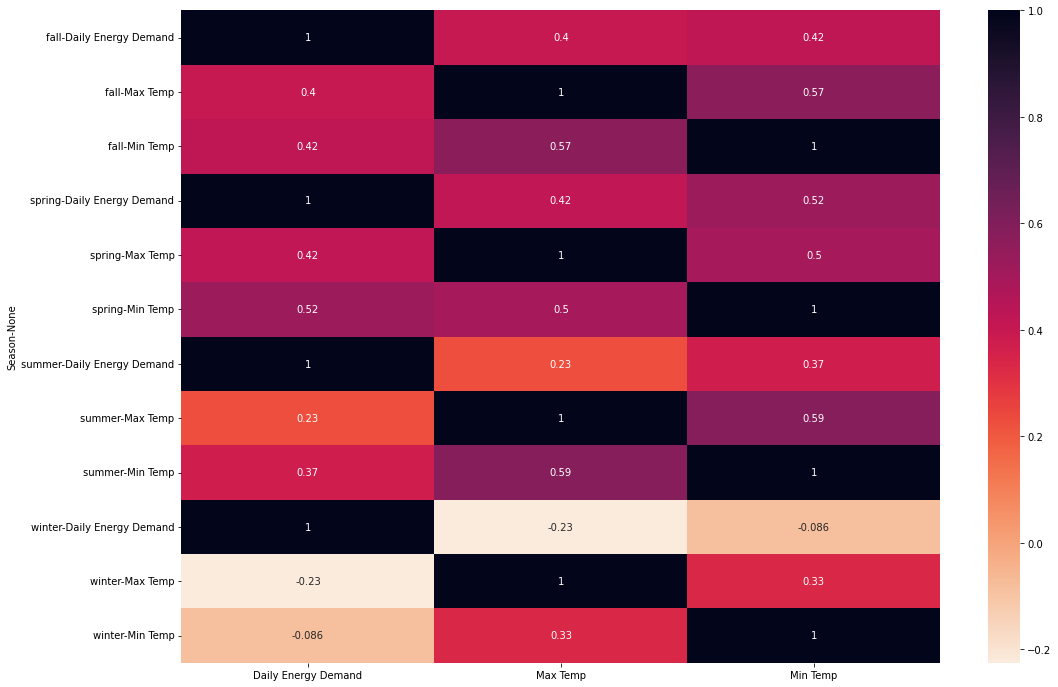

In [321]:
plt.figure(figsize=(17,12))
sns.heatmap(df.drop('Year', axis=1).groupby('Season').corr(), cmap='rocket_r', annot=True)

The quantitative data in the heatmap provides a more holistic understanding of what variables correlate to one another. Both summer and winter temperatures have worse correlation to the energy demand than spring and fall. Of note, the winter minimum temperatures have essentially no correlation with the energy demand! 

Two things may be going on here:
- In the winter, weather may be less of a predictor of energy demand because people are using gas-powered heating furnaces that are not pulling electricity from the grid.
- In the summer, California's large geographic footprint results in highly variable temperatures and additional data features like population density in each region could be important.


### Examining the influence of weekends on data

<AxesSubplot:ylabel='Day-None'>

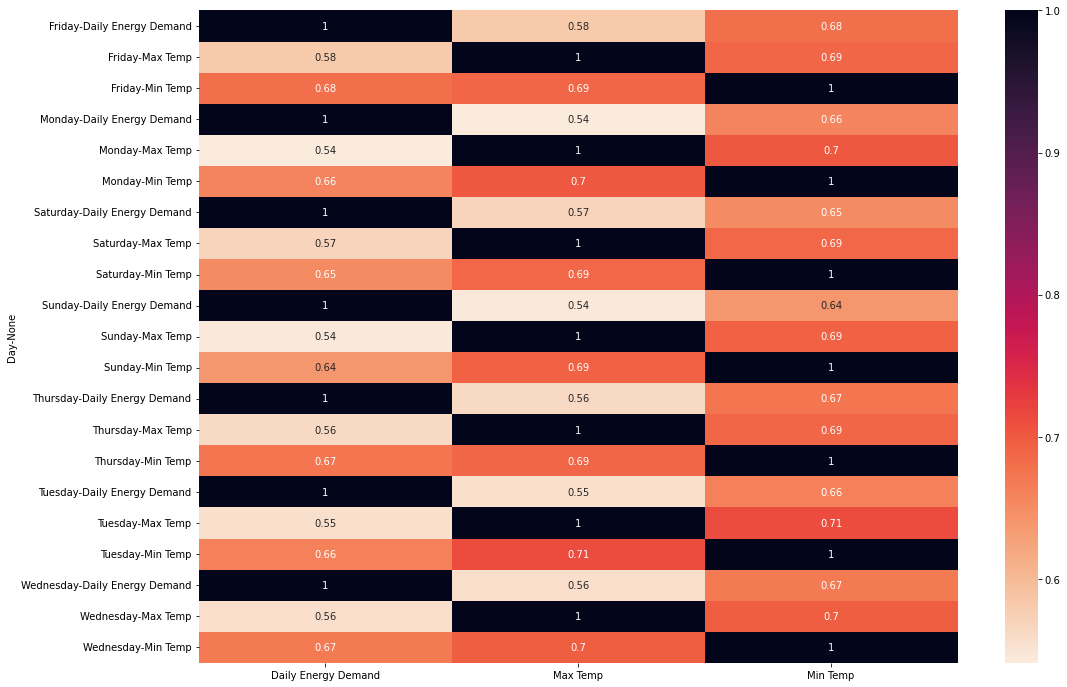

In [268]:
plt.figure(figsize=(17,12))
sns.heatmap(df.drop('Year', axis=1).groupby('Day').corr(), cmap='rocket_r', annot=True)

There isn't much difference in Daily Energy Demand correlation with temperatures when the data are grouped by days of the week. Therefore, it is not worth creating an additional feature like weekend/weekday. We will eventually turn the days into dummy variables though since we know that they have a diferent correlation with the energy demand.

## Creating dummy variables for the station location and season.

In [171]:
station_dummies = pd.get_dummies(df['Station Location'], drop_first=True)
#dropping first column to prevent having repeated data in the df

In [172]:
df_dummies = pd.concat([df.drop('Station Location',axis=1),station_dummies],axis=1)